### Polynomial regression. Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#### house prices dataset

- make a regression model to predict the price of the houses based on some predictor variables

In [2]:
df = pd.read_csv('../../data/housing/housing_prices.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.416514,0.326606,1819.852599,0.446361
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.493434,0.469402,839.091825,0.159492
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,381.000000,0.166667
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1237.500000,0.333333
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1666.666667,0.400000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2183.333333,0.500000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,6600.000000,1.000000


### Regression: should we consider a liner or a polynomial regression model ?

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

- if we sort the dataset by *price* and we plot it we can see that prices do not scale linearly
- thus consider a ***polynomial regression***

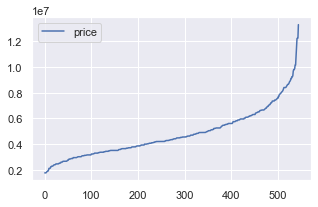

In [6]:
_, axs = plt.subplots(1, 1, figsize = (5, 3))
sns.lineplot(ax = axs, data = df[['price']].sort_values(by = 'price', ignore_index = True));

#### predictors (independent variables)

In [7]:
predictors = df.columns[1:]
predictors

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished', 'areaperbedroom', 'bbratio'],
      dtype='object')

#### train/test split

In [8]:
X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 4467)

#### polynomial regression (degree = 2)

In [9]:
d2_pipeline = make_pipeline(PolynomialFeatures(degree = 2, include_bias = False), LinearRegression())
d2_pipeline.fit(X_train[predictors], X_train['price'].to_numpy().reshape(-1, 1))

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

- model coeficients

In [10]:
d2_model = d2_pipeline.steps[1][1]
d2_model.coef_.shape, d2_model.intercept_, d2_model.coef_

((1, 135),
 array([2090692.01235535]),
 array([[ 2.66106460e+03, -1.08097780e+06, -6.58712009e+06,
         -2.93105124e+05,  3.67978443e+05, -3.91629423e+06,
          1.20685375e+06,  1.04085262e+07,  2.73941917e+06,
         -9.35724612e+05, -1.04270273e+06,  3.50264582e+05,
          2.52137901e+06, -8.92167359e+03,  2.66256102e+07,
          1.02810065e-01, -6.77291750e+02,  1.21103073e+03,
         -8.18667395e+02,  6.97905271e+02, -6.87496292e+02,
         -7.07289973e+01, -7.00724207e+02, -5.99386109e+01,
         -6.58919303e+01,  4.59622864e+02, -8.59984409e+01,
         -2.95784270e+02, -7.71655512e-01, -3.18347393e+03,
          2.70025074e+05,  1.65599309e+06,  1.11226606e+05,
         -3.32208619e+04,  2.69436023e+06, -6.88477443e+05,
         -6.43272390e+06, -1.60507581e+06,  2.38535118e+05,
         -1.38400783e+05, -2.87377307e+05, -1.91147480e+06,
          2.66138575e+03, -6.58711956e+06, -5.71861101e+06,
          2.24217054e+06, -2.00461849e+06, -3.80597470e+06,
 

In [11]:
X_train['predicted'] = d2_pipeline.predict(X_train[predictors])
X_test['predicted'] = d2_pipeline.predict(X_test[predictors])

#### plot predicted values

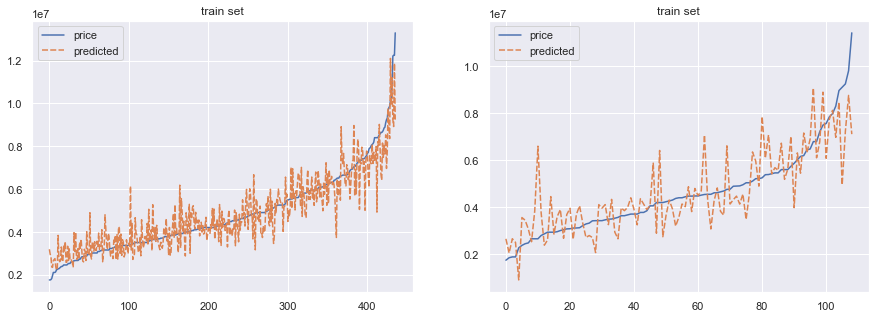

In [12]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
sns.lineplot(ax = axs[0], data = X_train[['price', 'predicted']].sort_values(by = 'price', ignore_index = True))
axs[0].set_title('train set')
sns.lineplot(ax = axs[1], data = X_test[['price', 'predicted']].sort_values(by = 'price', ignore_index = True))
axs[1].set_title('train set');

In [13]:
# error on train set
print('RMSE_train %.2f$' %np.sqrt(mean_squared_error(X_train['price'], X_train['predicted'])))
print('RSQR_train %.4f' %r2_score(X_train['price'], X_train['predicted']))

RMSE_train 818978.04$
RSQR_train 0.8114


In [14]:
# error on test set
print('RMSE_test %.2f$' %np.sqrt(mean_squared_error(X_test['price'], X_test['predicted'])))
print('RSQR_test %.4f' %r2_score(X_test['price'], X_test['predicted']))

RMSE_test 1155986.40$
RSQR_test 0.5819


#### polynomial regression (degree = 3)

In [15]:
pipeline = make_pipeline(PolynomialFeatures(degree = 3, include_bias = False), LinearRegression())
pipeline.fit(X_train[predictors], X_train['price'])

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

- model coeficients

In [16]:
model = pipeline.steps[1][1]
model.intercept_, model.coef_

(-73489019.50994281,
 array([-4.68075618e+06,  1.96199274e+07,  2.90834176e+07, -3.58999703e+07,
        -1.00463810e+07,  3.10924983e+06, -1.67861390e+07, -2.25363544e+05,
        -7.91683044e+06,  1.81216277e+06,  6.30111604e+05, -1.17444071e+07,
         3.10277413e+06,  4.53942607e+06,  6.38677853e+06,  1.52776890e+06,
         1.87038331e+06, -8.09189788e+05,  9.65506956e+05,  2.02903215e+06,
         1.29012044e+06,  3.02853202e+05,  2.06488397e+05,  1.08301876e+06,
        -4.96012141e+05, -5.33483751e+05,  2.49619373e+05, -4.56297013e+05,
        -4.05499351e+05,  1.81404792e+06,  1.82114932e+07,  2.85241490e+07,
        -2.63430745e+07,  1.10298736e+07,  1.51551331e+06, -2.62070924e+07,
        -1.90341777e+05,  5.35459836e+06,  6.57993576e+06, -2.00176425e+06,
        -2.20399868e+07,  3.57311304e+07,  1.66289013e+06,  1.60090241e+07,
         2.65924329e+07, -1.31963470e+06,  8.66436324e+06,  8.00434010e+06,
         7.72707503e+06, -6.53659809e+04,  2.98684326e+05, -3.01001

In [17]:
X_train['predicted'] = pipeline.predict(X_train[predictors])
X_test['predicted'] = pipeline.predict(X_test[predictors])

#### plot predicted values

Text(0.5, 1.0, 'test set')

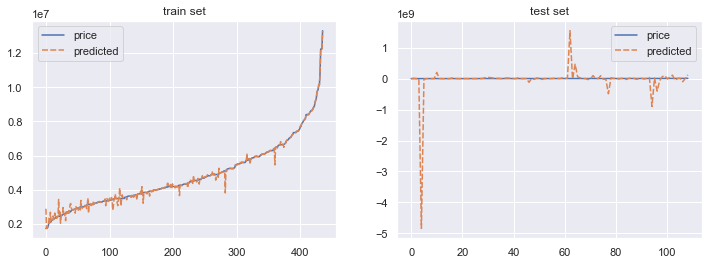

In [18]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4))
sns.lineplot(ax = axs[0], data = X_train[['price', 'predicted']].sort_values(by = 'price', ignore_index = True))
axs[0].set_title('train set')
sns.lineplot(ax = axs[1], data = X_test[['price', 'predicted']].sort_values(by = 'price', ignore_index = True))
axs[1].set_title('test set')

### +++ overfitting !!! +++

In [19]:
# error on train set
print('RMSE_train %.2f$' %np.sqrt(mean_squared_error(X_train['price'], X_train['predicted'])))
print('RSQR_train %.4f' %r2_score(X_train['price'], X_train['predicted']))

RMSE_train 161960.68$
RSQR_train 0.9926


- with the training set the error with a 3 degree polynomial is lower then the error with a 2 degree polynomial (818978.04$), but ...

In [20]:
# error on test set
print('RMSE_test %.2f$' %np.sqrt(mean_squared_error(X_test['price'], X_test['predicted'])))
print('RSQR_test %.4f' %r2_score(X_test['price'], X_test['predicted']))

RMSE_test 501799471.43$
RSQR_test -78782.9087


- ***with the test set the error is huge !!!***

##### visualize the magnitude of the error

Text(0.5, 1.0, 'test set_lowerror')

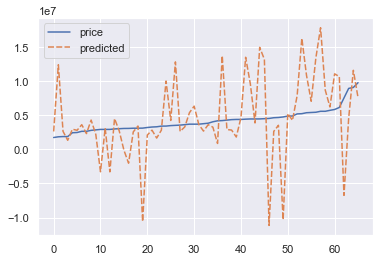

In [21]:
# discard test data with error > RMSE /1000
mse = mean_squared_error(X_test['price'], X_test['predicted'])
X_lowerr = X_test.loc[(X_test.price -X_test.predicted)**2 < mse /1000]
sns.lineplot(data = X_lowerr[['price', 'predicted']].sort_values(by = 'price', ignore_index = True))
axs[1].set_title('test set_lowerror')